## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터

### 1. EDA, 전처리
1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score,confusion_matrix, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [139]:
from google.colab import drive
drive.mount('/content/gdrive')
path  = "/content/gdrive/My Drive/"
fname = "diabetes.csv"
df=pd.read_csv(path + fname)

Mounted at /content/gdrive


In [140]:
df['Outcome'].value_counts(dropna=False,ascending=False)

0    500
1    268
Name: Outcome, dtype: int64

In [141]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [143]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [144]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

data의 양에 따라 적당한 test size는 달라지겠지만 이번 데이터의 경우 test size는 25-30% 정도가 가장 적합하다고 생각합니다. 이유는 data의 양이 그렇게 많은 편이 아니지만 충분한 학습데이터가 있어야 적합한 모델이 만들어지기 때문입니다.

1.7 stratify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

train set과 test set으로 분리할 때 적당한 비율로 클래스들을 나눠주기 때문에 stratify의 값을 설정합니다. 위의 경우에서 다른 속성들은 특정값의 비율로 나눠줄 필요가 없지만 y로 설정한 target 값같은 경우, 0 또는 1로만 분리되기 때문에 훈련세트와 테스트세트에서 일정한 비율로 값을 가질 수 있도록 설정해야 하기 때문에 이용한 것을 알 수 있습니다.

### 2. 예측 및 분석
2.0 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [146]:
def clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    print('오차 행렬,\\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2.1 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

실제 값과 모델 예측 값을 표로 만든 것으로 True Positive,False Positive, False Negative, True Negative로 나뉜다.

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='liblinear'로 설정, 예측 변수명은 pred, pred_proba).

In [147]:
#모델 훈련
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [148]:
#모델 예측
pred = model.predict(x_test)
pred_proba_c1 = model.predict_proba(x_test)[:, 1]

In [149]:
clf_eval(y_test, pred,pred_proba_c1)

오차 행렬,\n [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8436


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

LogisticRegression에서 solver 파라미터는 모델을 학습시킬 때 사용하는 알고리즘을 지정하는 역할을 합니다. newton-cg :  여러 번의 업데이트를 통해서 비용함수를 최소화하는 파라미터의 값을 찾는 방법/lbfgs : 뉴튼-랩슨 방법을 약간 변형한 방법으로, 차이점은 2차 도함수를 정확하게 계산하는 것이 아니라 근사치를 사용하여 속도를 개선했다는 점/liblinear : 경사하강법과 비슷하지만 한번에 하나의 파라미터만 업데이트/ sag : 경사하강법과 유사하게 작동하지만, 차이점은 이전 업데이트 단계에서의 경사값을 현재 업데이트에 사용한다는 점

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

pred는 최종 예측 결과를 제공하고 proba는 예측 결과의 확률을 제공합니다.

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
 def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    #X축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend(loc='best')
    plt.grid(True)

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

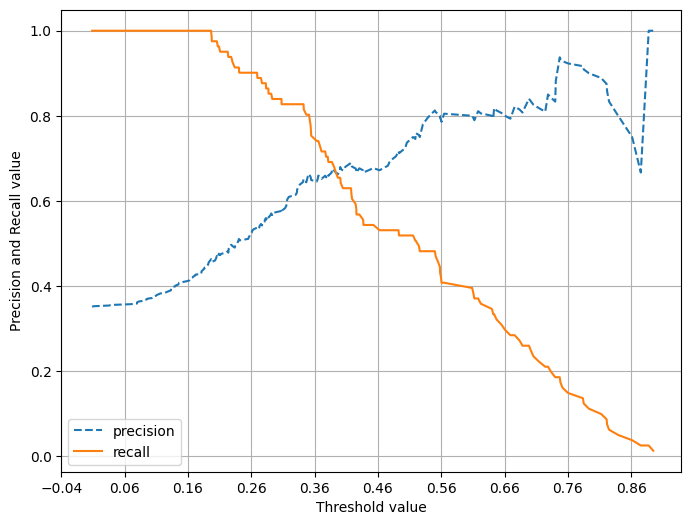

In [152]:
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [153]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [154]:
df.loc[df['BloodPressure'] == 0] = df.loc[df['BloodPressure'] == 0].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

In [157]:
X=df

2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

피처 스케일링은 서로 다른 변수의 값 범위를 일정한 수준으로 맞추어주는 과정입니다. 종류에는 표준화(standardization:변수들을 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환)와 정규화(nomalization:변수들의 값을 0과 1 사이의 범위로 조정)이 있습니다.

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [159]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=123,stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [160]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred_proba_c1 = model.predict_proba(x_test)[:, 1]
clf_eval(y_test, pred,pred_proba_c1)

오차 행렬,\n [[150   0]
 [  0  81]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.000000, F1: 1.0000, AUC:1.0000


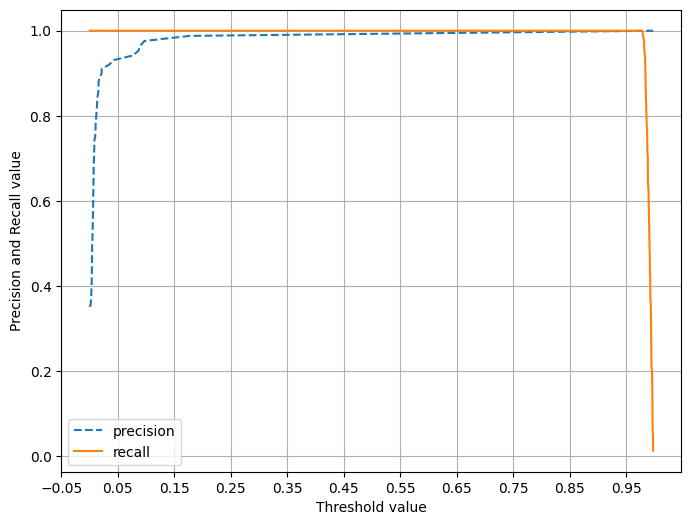

In [161]:
precision_recall_curve_plot(y_test, pred_proba_c1)

### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

- 데이터 준비, 전처리 : 피처스케일링, 이상치 제거
- 모델튜닝 : 규제화, 하이퍼파라미터 최적화

In [162]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122,70.0,27.0,0.0,36.8,0.340,27,0.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126,60.0,0.0,0.0,30.1,0.349,47,1.0


###하이퍼파라미터
- 그리드서치

In [173]:
new_model = LogisticRegression(max_iter=10000)

from sklearn.model_selection import GridSearchCV
LR_params = {
    'penalty' : ['l1', 'l2'], # 'none' 포함 가능
    'C': [0.001,0.01,0.015, 0.05, 0.1, 0.5, 1, 5, 10],
    'solver':['saga','liblinear','newton-cg','lbfgs','sag']
}

grid_search = GridSearchCV(new_model, param_grid=LR_params, cv=5)

grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.015, 0.05, 0.1, 0.5, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear', 'newton-cg', 'lbfgs',
                                    'sag']})

In [174]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [175]:
best_model = LogisticRegression(C=0.01, penalty='l1', solver='saga', max_iter=10000)
best_model.fit(x_train, y_train)
pred = best_model.predict(x_test)
pred_proba_c1 = best_model.predict_proba(x_test)[:, 1]
clf_eval(y_test, pred,pred_proba_c1)

오차 행렬,\n [[150   0]
 [  0  81]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.000000, F1: 1.0000, AUC:1.0000


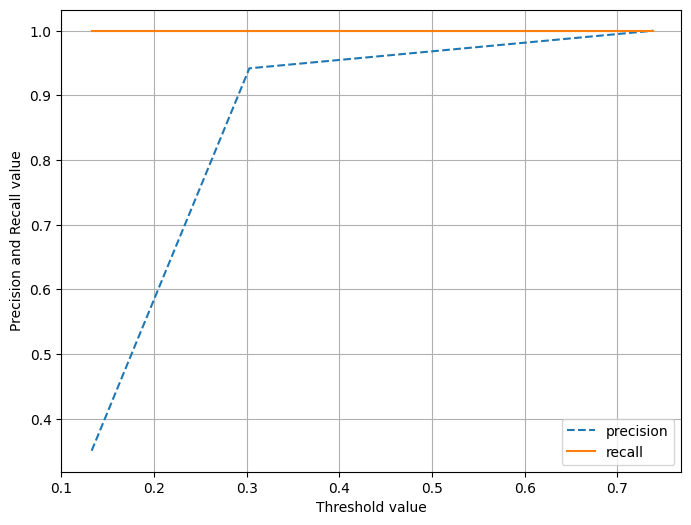

In [176]:
precision_recall_curve_plot(y_test, pred_proba_c1)